***FLIPKART PRODUCT-REVIEWS SENTIMENT ANALYSIS***

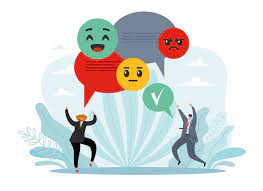

***In the ever-evolving landscape of e-commerce, understanding customer sentiments is paramount to enhancing user experience and product offerings. This project focuses on unraveling the sentiments embedded in Flipkart product reviews through the lens of Natural Language Processing (NLP). The objective is to develop a robust sentiment analysis model capable of categorizing reviews as positive, negative, or neutral. By harnessing advanced NLP techniques, we aim to decode the rich tapestry of customer opinions, providing Flipkart with invaluable insights to refine its offerings and improve customer satisfaction. This exploration into sentiment analysis serves as a gateway to deciphering the intricate nuances of consumer feedback, ultimately contributing to the continual evolution and optimization of the Flipkart shopping experience.***

1)IMPORTING NECESSARY LIBRARIES
1. **`import numpy as np`:** Imports the NumPy library and assigns it the alias "np." NumPy is commonly used for numerical operations in Python, especially for working with arrays and matrices.

2. **`import pandas as pd`:** Imports the Pandas library and assigns it the alias "pd." Pandas is widely used for data manipulation and analysis, providing data structures like DataFrames.

3. **`import seaborn as sns`:** Imports the Seaborn library and assigns it the alias "sns." Seaborn is built on top of Matplotlib and is used for statistical data visualization, providing a high-level interface.

4. **`import matplotlib.pyplot as plt`:** Imports the pyplot module from the Matplotlib library and assigns it the alias "plt." Matplotlib is a versatile plotting library, and pyplot provides a simple interface for creating various types of plots.

5. **`import nltk`:** Imports the Natural Language Toolkit (NLTK), a library for working with human language data. NLTK includes tools and resources for tasks such as tokenization, stemming, tagging, parsing, and sentiment analysis.

6. **`import re`:** Imports the regular expression module, which provides functions for working with regular expressions. Regular expressions are powerful for string manipulation and searching.

7. **`from nltk.sentiment.vader import SentimentIntensityAnalyzer`:** Specifically imports the SentimentIntensityAnalyzer class from the NLTK's VADER sentiment analysis tool. VADER is designed for analyzing sentiment in social media text.

8. **`from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator`:** Imports necessary components from the WordCloud library. Word clouds are visual representations of word frequency, and STOPWORDS typically contains common words excluded from word clouds. ImageColorGenerator is used for generating word clouds with specific color patterns based on an input image.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

2) LOADING THE DATASET

In [ ]:
df = pd.read_csv('/content/flipkart.csv')
df.columns = ['sno','product_name','review','rating']
df

,sno,product_name,review,rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


3) UNDERSTANDING THE DATASET

In [ ]:
df.head()

,sno,product_name,review,rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [ ]:
df.tail()

,sno,product_name,review,rating
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5
2303,2303,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Worth the money u spend for this monitor Great...,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sno           2304 non-null   int64 
 1   product_name  2304 non-null   object
 2   review        2304 non-null   object
 3   rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [ ]:
df.isna().sum()

sno             0
product_name    0
review          0
rating          0
dtype: int64

4) DATA CLEANING
Defining a function called `clean` and applying it to the "review" column in a DataFrame (`df`). Let's break down the function and its application:

1. **`nltk.download('stopwords')`:** Downloads the NLTK stopwords dataset, which contains common words that are often excluded in text analysis.

2. **`stemmer = nltk.SnowballStemmer('english')`:** Creates a Snowball stemmer for English. Stemming is the process of reducing words to their root form, helping to standardize word variations.

3. **`from nltk.corpus import stopwords`:** Imports the NLTK stopwords corpus.

4. **`import string`:** Imports the string module, which provides a collection of string constants containing punctuation.

5. **`stopword = set(stopwords.words('english'))`:** Creates a set of English stopwords.

6. **`def clean(text): ...`:** Defines a function called `clean` that takes a text input and performs several text cleaning operations.

   - **`text = str(text).lower()`:** Converts the text to lowercase.
   - **`text = re.sub('\[.*?\]', '', text)`:** Removes square brackets and their contents.
   - **`text = re.sub('https?://\S+|www\.\S+', '', text)`:** Removes URLs.
   - **`text = re.sub('<.*?>+', '', text)`:** Removes HTML tags.
   - **`text = re.sub('[%s]' % re.escape(string.punctuation), '', text)`:** Removes punctuation.
   - **`text = re.sub('\n', '', text)`:** Removes newline characters.
   - **`text = re.sub('\w*\d\w*', '', text)`:** Removes words containing digits.
   - **`text = [word for word in text.split(' ') if word not in stopword]`:** Removes stopwords.
   - **`text = " ".join(text)`:** Joins the list of words back into a string.
   - **`text = [stemmer.stem(word) for word in text.split(' ')]`:** Applies stemming to each word.
   - **`text = " ".join(text)`:** Joins the stemmed words back into a string.

7. **`df["review"] = df["review"].apply(clean)`:** Applies the `clean` function to the "review" column in the DataFrame (`df`). It seems like you're cleaning the text data in the "review" column using the defined `clean` function.

This cleaning process aims to standardize and preprocess the text data in the "review" column, making it more suitable for analysis and modeling.

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["review"] = df["review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


5)DATA VISUALIZATION
The chart provides a quick and visual understanding of how ratings are distributed among different categories, contributing to a comprehensive analysis of customer sentiments.

In [ ]:
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

Representation of the rating distribution, with each rating category having a distinct color.

<BarContainer object of 5 artists>

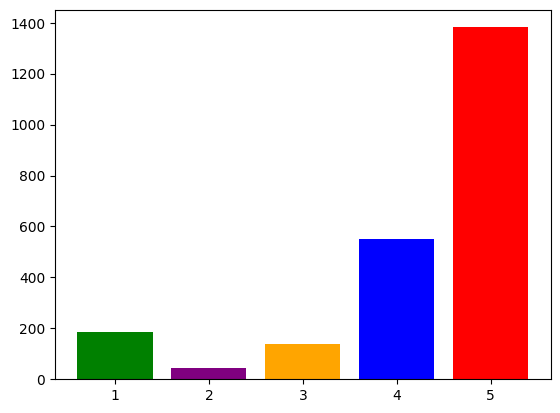

In [ ]:
x=[5,4,1,3,2]
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.bar(x,df['rating'].value_counts(),color=colors)

6)CATEGORIZING THE REVIEWS

Defined a function called `getAnalysis` and applied it to the 'rating' column in the DataFrame (`df`) to create a new column named 'analysis1'. The purpose of this function seems to be categorizing the ratings into 'Negative', 'Neutral', or 'Positive'. Here's a brief breakdown of your code:

1. **`def getAnalysis(rating): ...`:** Defines a function called `getAnalysis` that takes a 'rating' as input and categorizes it as 'Negative' if it's less than 3, 'Neutral' if it's equal to 3, and 'Positive' otherwise.

2. **`df['analysis1'] = df['rating'].apply(getAnalysis)`:** Applies the `getAnalysis` function to the 'rating' column of the DataFrame and creates a new column 'analysis1' to store the corresponding sentiment analysis results.

This code effectively categorizes each rating in the 'rating' column into one of three sentiment categories based on the defined criteria. The resulting DataFrame (`df`) now includes a new column, 'analysis1', containing the sentiment analysis results for each rating.

In [ ]:
def getAnalysis(rating):
    if rating<3:
        return 'Negative'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positive'

df['analysis1'] = df['rating'].apply(getAnalysis)

df

,sno,product_name,review,rating,analysis1
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5,Positive
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5,Positive
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5,Positive
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5,Positive
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5,Positive
...,...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,great display accur colour price rang,5,Positive
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,superb monitor first brought use month bough...,5,Positive
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,awesom,5,Positive
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,one issu adapt,5,Positive


Using the TextBlob library to perform sentiment analysis on the 'review' column in the DataFrame (`df`).Created two new columns, 'Subjectivity' and 'Polarity', to store the subjectivity and polarity scores for each review. Here's a brief explanation of the code:


1. **`from textblob import TextBlob`:** Imports the TextBlob library, which is a powerful tool for processing textual data and extracting various natural language processing features, including sentiment analysis.

2. **`def getSubjectivity(text): ...`:** Defines a function called `getSubjectivity` that takes a 'text' input and returns the subjectivity score using TextBlob's sentiment analysis.

3. **`def getPolarity(text): ...`:** Defines a function called `getPolarity` that takes a 'text' input and returns the polarity score using TextBlob's sentiment analysis.

4. **`df['Subjectivity'] = df['review'].apply(getSubjectivity)`:** Applies the `getSubjectivity` function to the 'review' column of the DataFrame and creates a new column 'Subjectivity' to store the subjectivity scores.

5. **`df['Polarity'] = df['review'].apply(getPolarity)`:** Applies the `getPolarity` function to the 'review' column of the DataFrame and creates a new column 'Polarity' to store the polarity scores.

Now, the DataFrame (`df`) includes two additional columns, 'Subjectivity' and 'Polarity', providing quantitative measures of subjectivity and polarity for each review in the dataset. These scores can be useful for further sentiment analysis and interpretation.

In [ ]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['review'].apply(getSubjectivity)
df['Polarity'] = df['review'].apply(getPolarity)

In [ ]:
df

,sno,product_name,review,rating,analysis1,Subjectivity,Polarity
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5,Positive,0.479630,0.451852
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5,Positive,0.600000,0.700000
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5,Positive,0.450000,-0.062500
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5,Positive,0.300000,1.000000
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5,Positive,0.577273,0.268182
...,...,...,...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,great display accur colour price rang,5,Positive,0.750000,0.800000
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,superb monitor first brought use month bough...,5,Positive,0.666667,0.625000
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,awesom,5,Positive,0.000000,0.000000
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,one issu adapt,5,Positive,0.000000,0.000000


In natural language processing (NLP), subjectivity and polarity are two aspects of sentiment analysis, which is the process of determining the sentiment or emotion expressed in a piece of text. Both subjectivity and polarity are used to understand the sentiment conveyed by the text.

1. **Subjectivity:**
   - **Definition:** Subjectivity refers to the extent to which a piece of text expresses opinions, feelings, or personal judgments rather than being factual or objective.
   - **Range:** Subjectivity is often measured on a scale from 0 to 1, where 0 indicates complete objectivity (factual) and 1 indicates complete subjectivity (opinionated).
   - **Example:** In the sentence "I love this product," the expression of love indicates high subjectivity.

2. **Polarity:**
   - **Definition:** Polarity measures the sentiment orientation of a piece of text, indicating whether the expressed sentiment is positive, negative, or neutral.
   - **Range:** Polarity is commonly represented on a scale from -1 to 1, where -1 indicates a highly negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a highly positive sentiment.
   - **Example:** In the sentence "I hate waiting," the word 'hate' indicates a negative sentiment, resulting in a negative polarity.

Tools like TextBlob, which you've used in your code, often provide these sentiment analysis metrics. The `subjectivity` score represents how subjective the text is, while the `polarity` score represents the sentiment's positivity or negativity. These metrics are useful for understanding the emotional tone of textual data, making them valuable in applications such as social media analysis, customer feedback analysis, and more.

Extending the sentiment analysis by categorizing the polarity scores into 'Negative', 'Neutral', or 'Positive' and stored the results in a new column 'analysis2'. Here's a breakdown of the code:


1. **`def getAnalysis(score): ...`:** Defines a function called `getAnalysis` that takes a 'score' as input and categorizes it as 'Negative' if it's less than 0, 'Neutral' if it's equal to 0, and 'Positive' otherwise.

2. **`df['analysis2'] = df['Polarity'].apply(getAnalysis)`:** Applies the `getAnalysis` function to the 'Polarity' column of the DataFrame and creates a new column 'analysis2' to store the sentiment analysis results based on the polarity scores.

Now, the DataFrame (`df`) includes two sets of sentiment analysis results: 'analysis1', which categorizes ratings into 'Negative', 'Neutral', or 'Positive', and 'analysis2', which categorizes polarity scores into the same sentiment categories. This dual approach provides a more nuanced understanding of sentiments in your text data.

In [ ]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

df['analysis2'] = df['Polarity'].apply(getAnalysis)

df

,sno,product_name,review,rating,analysis1,Subjectivity,Polarity,analysis2
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5,Positive,0.479630,0.451852,Positive
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5,Positive,0.600000,0.700000,Positive
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5,Positive,0.450000,-0.062500,Negative
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5,Positive,0.300000,1.000000,Positive
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5,Positive,0.577273,0.268182,Positive
...,...,...,...,...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,great display accur colour price rang,5,Positive,0.750000,0.800000,Positive
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,superb monitor first brought use month bough...,5,Positive,0.666667,0.625000,Positive
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,awesom,5,Positive,0.000000,0.000000,Neutral
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,one issu adapt,5,Positive,0.000000,0.000000,Neutral


Requesting the count of each sentiment category from the 'analysis1' and 'analysis2' columns in the DataFrame. This will provide a breakdown of how many reviews fall into each sentiment category

In [ ]:
df['analysis1'].value_counts()

Positive    1934
Negative     230
Neutral      140
Name: analysis1, dtype: int64

In [ ]:
df['analysis2'].value_counts()

Positive    1965
Neutral      188
Negative     151
Name: analysis2, dtype: int64

 Created a scatter plot to visualize sentiment analysis results using both polarity and subjectivity scores

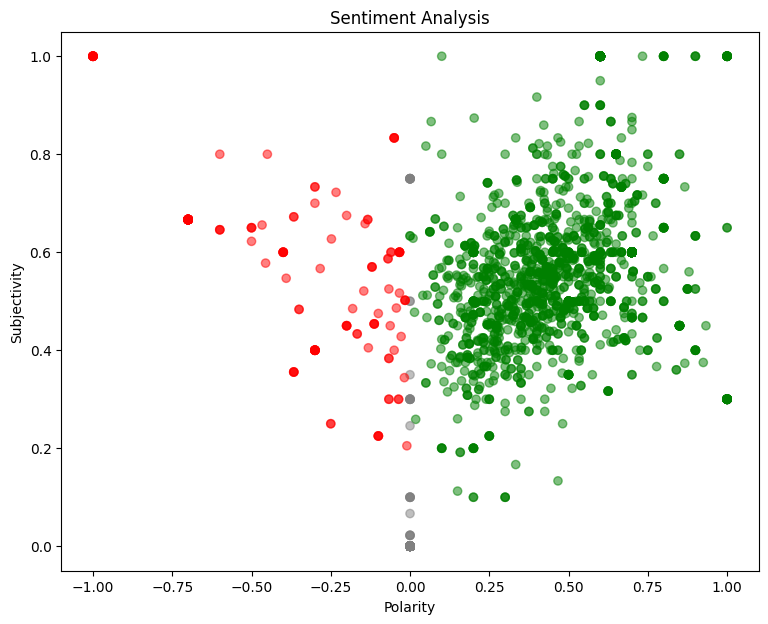

In [ ]:
# Define colors based on sentiment categories
colors = {'Negative': 'red', 'Neutral': 'grey', 'Positive': 'green'}

# Plot the polarity and subjectivity on a scatter plot with different colors
plt.figure(figsize=(9, 7))
plt.scatter(df['Polarity'], df['Subjectivity'], c=df['analysis2'].map(colors), alpha=0.5)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


create_wordcloud function designed to generate and display a word cloud from the input text.

In [ ]:
def create_wordcloud(text, stopwords=None):
    if stopwords is None:
        stopwords = set(STOPWORDS)

    all_words = ' '.join([x for x in text])
    wordCloud = WordCloud(
        background_color='white',
        width=800,
        height=500,
        random_state=21,
        max_font_size=130,
        stopwords=stopwords  # Use custom stopwords
    ).generate(all_words)

    plt.figure(figsize=(20, 10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()


Let's break down the `create_wordcloud` function line by line:

1. **`def create_wordcloud(text, stopwords=None):`**
   - This line defines a function named `create_wordcloud` that takes two parameters: `text` (the input text for generating the word cloud) and `stopwords` (optional custom stopwords to be used in the word cloud).

2. **`if stopwords is None:`**
   - This line checks if the `stopwords` parameter is not provided when calling the function.

3. **`stopwords = set(STOPWORDS)`**
   - If `stopwords` is not provided, this line sets `stopwords` to the default set of stopwords from the `STOPWORDS` variable in the `wordcloud` library. These stopwords are common words (e.g., 'the', 'and', 'is') that are often excluded from word clouds.

4. **`all_words = ' '.join([x for x in text])`**
   - This line uses a list comprehension to join all elements in the `text` parameter into a single string, separated by spaces.

5. **`wordCloud = WordCloud(...).generate(all_words)`**
   - This line creates a `WordCloud` object with various parameters:
      - `background_color`: Sets the background color of the word cloud (white in this case).
      - `width` and `height`: Specify the width and height of the word cloud in pixels.
      - `random_state`: Provides reproducibility by seeding the random number generator.
      - `max_font_size`: Sets the maximum font size for the words in the cloud.
      - `stopwords`: Uses the custom stopwords set.

6. **`plt.figure(figsize=(20, 10))`**
   - This line sets the figure size for the word cloud plot.

7. **`plt.imshow(wordCloud)`**
   - This line displays the word cloud image on the plot.

8. **`plt.axis('off')`**
   - This line turns off the axis labels to provide a cleaner visualization.

9. **`plt.show()`**
   - This line shows the final word cloud plot.

This function essentially takes a text input, generates a word cloud using the specified or default stopwords, and displays the word cloud plot.

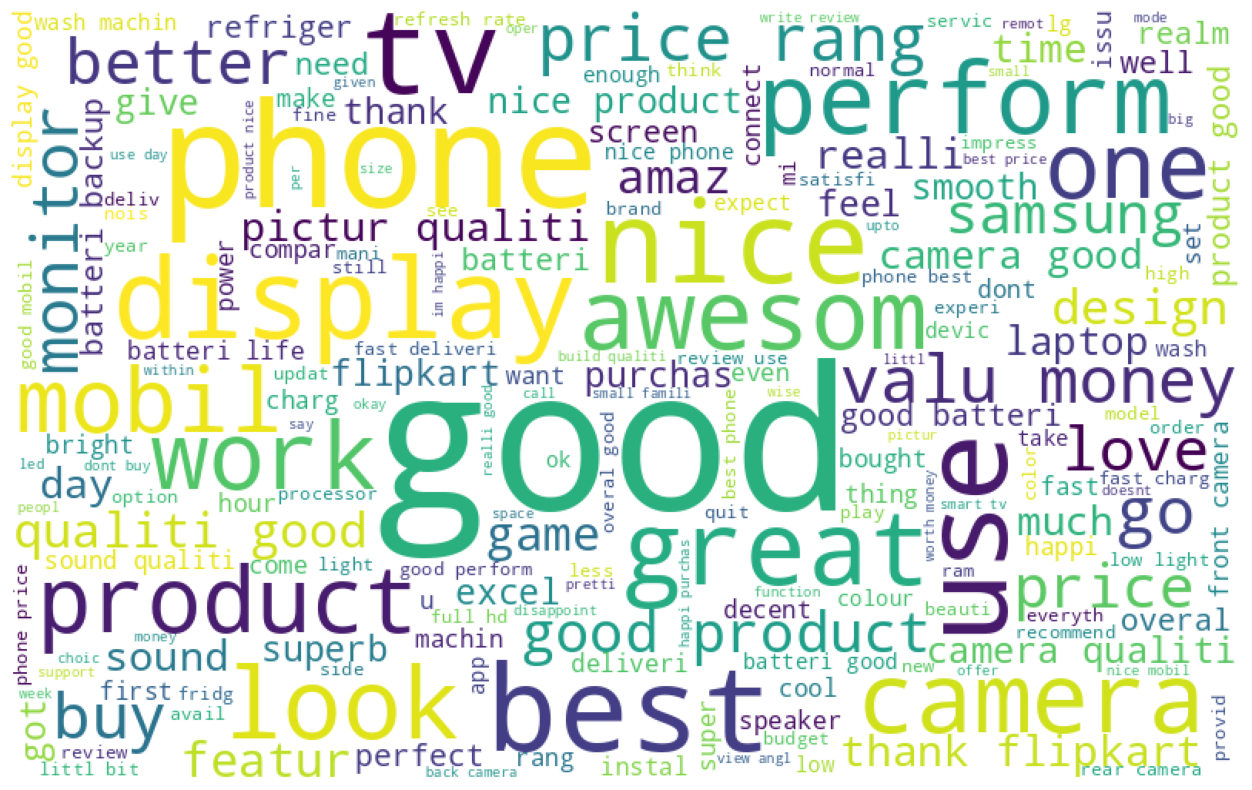

In [ ]:
# Word Cloud for Positive Reviews
create_wordcloud(df[df['analysis2'] == 'Positive']['review'])



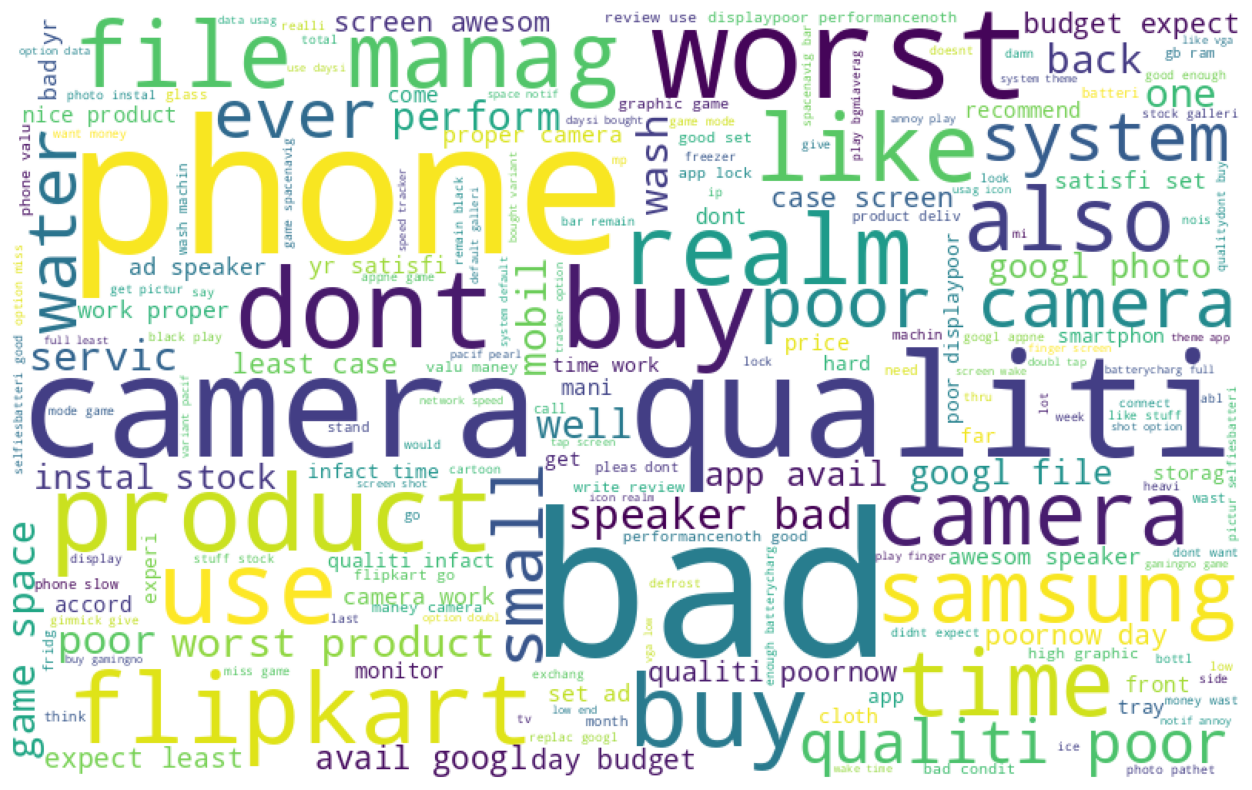

In [ ]:

# Word Cloud for Negative Reviews
create_wordcloud(df[df['analysis2'] == 'Negative']['review'], stopwords={'not', 'other', 'custom', 'stopwords'})

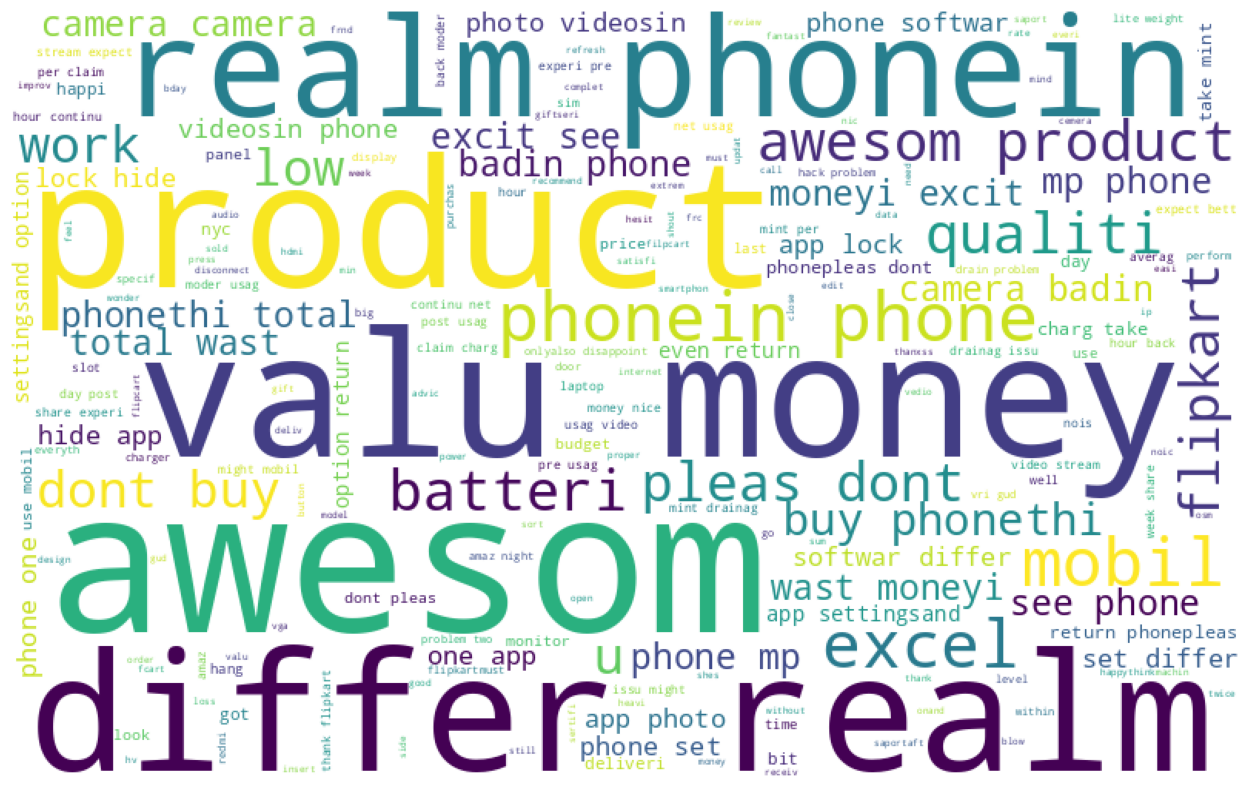

In [ ]:
# Word Cloud for Neutral Reviews
create_wordcloud(df[df['analysis2'] == 'Neutral']['review'])